# Dimensionality reduction: PCA
## BIOS 26211 winter 2023
## Name: Keegan Ballantyne

In this assignment you will write your own function to principal component analysis and use it to reduce the dimensionality of data.

In [2]:
# Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities
from scipy import stats
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns; sns.set() # data visualization

## Part 1: PCA

Here is a randomly generated two-variable data set along with PCA calculation using the function from sklearn:


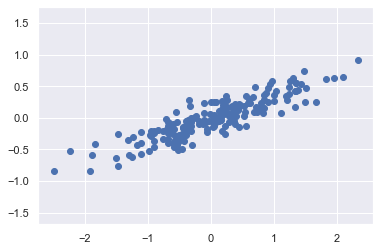

The principal components:
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
Fraction of explained variance for each PC:
 [0.97634101 0.02365899]


In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T


plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

pca = PCA(n_components=2)
pca.fit(X)

print("The principal components:\n", pca.components_)
print("Fraction of explained variance for each PC:\n", pca.explained_variance_/sum(pca.explained_variance_))

### 1.1 Implementation

You will create a function to implement PCA. Here are its requirements:

* Inputs: N by M matrix of data, the dimension along with to perform PCA (0 or 1 representing rows or columns), and the number (k) of principal components to return.

* DO: 
    - calculate the covariance matrix of the data set along the correct dimension. Hint: np.cov() has a convenient input argument rowvar https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html 
    - calculate the eigenvalues and eigenvectors of the covariance matrix
    - calculate the coefficient of determination for each PC, which is the fraction of the eigenvalue out of the sum of all eigenvalues (a.k.a. the trace of the covariance matrix)

* Outputs: k principal components and their respective coefficients of determinaton (eigenvalues divided by their sum)


Test the function on the simple two-variable data set generated below to make sure you get the same eigenvalues and PCs (up to scalar multiplication) as from the sklearn function `PCA`.

In [4]:
def pca_func(matrix, dimension, k): #, num_comp
    """Function that implements PCA on a given N by M matrix of data that returns a number of PCs"""
    cov_m = np.cov(matrix, rowvar = dimension) # 0 = True and 1 = False
    evals, evecs = np.linalg.eig(cov_m) # Calculates the eigenvalues and eigenvectors of covariance matrix
    cod = evals/cov_m.trace() # Calculates the coefficients of determination
    evecs = evecs[:,:k] # indexes the eigenvectors to return the k number of prinicple components
    return evecs, cod # returns the k number of principle components and their respective coefficients of determination

pca_func(X, 0, 2)
    
    

(array([[ 0.94446029, -0.32862557],
        [ 0.32862557,  0.94446029]]),
 array([0.97634101, 0.02365899]))

### 1.2 Projection of the data

Project the two-variable data onto the first principal component and plot the results in the plane, with the points on the axis of the 1st PC. This requires two steps:

1. Multiply the data by the first principal component to get the coordinates (use np.multiply or @)
2. Multiply the coordinates by the first principal component to obtain the two-dimensional points (use np.outer)

Use the scatterplot from PCA_examples as a guide and verify that your plot is the same.

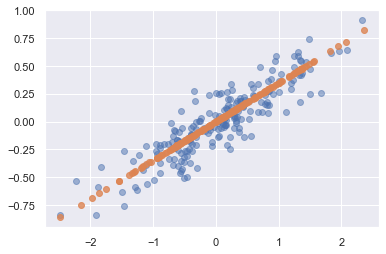

In [5]:
evecs, cod = pca_func(X, 0, 1)
mult = X@evecs
gfg = np.outer(mult, evecs)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.scatter(gfg[:, 0], gfg[:, 1], alpha=0.8)

## Part 2: breast cancer data set

The Wisconsin breast cancer data set contains information about different tumor biopsies in the form of 30 features of cell nuclei determined from images. The first two variables are the sample ID and the diagnosis (M = malignant or B = benign). The source and description of the data is here: https://archive-beta.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+diagnostic

The file `wdbc.csv` is loaded in the script below which also prints the names of all 32 variables in the header. Use the .iloc factor (see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integer) to select only the features that will be used in PCA by leaving out the first two variables and assign them to a new numpy array, and assign a pandas array for the diagnosis in variable index 1.

In [6]:
wdbc = pd.read_csv("wdbc.csv")
wdbc.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
wdbc_new = wdbc.drop(['ID', 'Diagnosis'], axis = 1)
wdbc_new

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 2.1 Perform PCA on the cell features

Plot the correlation matrix between the 30 features (use the code from PCA_example as a guide) to see if there are any strong relationships between the features in this data.

Use your own function to calculate the PCA and print out the fraction of variance captured by the first two principal components.

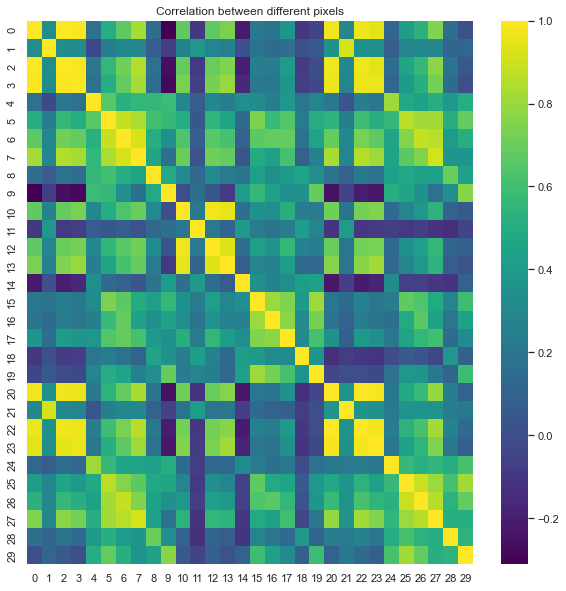

0.9820446715106628 0.016176489863510935


In [8]:
correlation = np.corrcoef(wdbc_new, rowvar=0)
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1,  cmap='viridis')

plt.title('Correlation between different pixels')
plt.show()

evecs, cod = pca_func(wdbc_new, 0, 2)
print(cod[0], cod[1])

### 2.2 Reduce the dimensions of the data

Project each of the sample vectors onto the top 2 principal components and visualize the data as a scatterplot (see example of such a scatterplot with the digits data in PCA_examples notebook).

Two important steps: 

1) subtract off the mean of each variable before projecting them onto the PCs (use np.mean)

2) multiply the zero-mean data set by the two principal components and turn the result into a numpy array, otherwise it's a tuple

Use the diagnosis column from the data set to color the points by whether they are malignant or benign (use the seaborn scatterplot from PCA_example as your guide). Comment on whether this representation is amendable to efficient classification of malignant vs benign samples.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


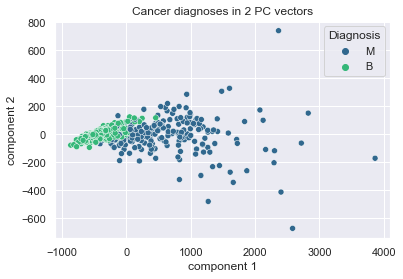

In [9]:
evecs, cod = pca_func(wdbc_new, 0, 2)

col = len(wdbc_new.columns)
row = len(wdbc_new.index)

for i in np.arange(0, col):
    i_col = wdbc_new.iloc[:, i]
    col_mean = np.mean(i_col)
    for j in np.arange(0, row):
        wdbc_new.iloc[j,i] = wdbc_new.iloc[j, i]-col_mean

alpha = wdbc_new.to_numpy()
beta = alpha@evecs

sns.scatterplot(beta[:, 0], beta[:, 1],
            hue=wdbc.Diagnosis, palette="viridis")
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Cancer diagnoses in 2 PC vectors')
plt.show()

I believe that this representation is amendable to analyze efficient classification of benign or malignant cancer cells based on its clustering from the visualization

## Part 3: Gene expression data set

The Spellman dataset provides the gene expression data measured in *Saccharomyces cerevisiae* cell cultures that have been synchronized at different points of the cell cycle. References are here: http://finzi.psych.upenn.edu/library/minerva/html/Spellman.html

The following script loads the file `Spellman.csv` that contains the time and the transcription levels of 4381 different genes. Use the .iloc factor (see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integer) to select only the gene expression levels (exclude the first column that contains time) and assign them to a new numpy array.

In [10]:
spellman = pd.read_csv("Spellman.csv")
spellman.head()

,time,YAL001C,YAL014C,YAL016W,YAL020C,YAL022C,YAL036C,YAL038W,YAL039C,YAL040C,...,YPR189W,YPR191W,YPR193C,YPR194C,YPR197C,YPR198W,YPR199C,YPR201W,YPR203W,YPR204W
0,40,-0.07,0.215,0.15,-0.350,-0.415,0.540,-0.625,0.05,0.335,...,0.13,-0.435,-0.005,-0.365,0.015,-0.06,0.155,-0.255,0.57,0.405
1,50,-0.23,0.090,0.15,-0.280,-0.590,0.330,-0.600,-0.24,0.050,...,0.08,-0.130,0.020,-0.590,0.100,0.08,0.190,-0.360,0.12,0.170
2,60,-0.10,0.025,0.22,-0.215,-0.580,0.215,-0.400,-0.19,-0.040,...,-0.06,-0.350,-0.180,-0.550,0.210,0.21,0.235,-0.300,-0.07,-0.045
3,70,0.03,-0.040,0.29,-0.150,-0.570,0.100,-0.200,-0.14,-0.130,...,-0.20,-0.570,-0.380,-0.510,0.320,0.34,0.280,-0.240,-0.26,-0.260
4,80,-0.04,-0.040,-0.10,0.160,-0.090,-0.270,-0.130,-1.22,0.020,...,0.05,-0.210,0.030,0.390,0.110,0.65,-0.260,1.300,-0.44,-0.600


In [11]:
spell_new = spellman.drop(['time'], axis = 1)
spell_new.head()

,YAL001C,YAL014C,YAL016W,YAL020C,YAL022C,YAL036C,YAL038W,YAL039C,YAL040C,YAL044C,...,YPR189W,YPR191W,YPR193C,YPR194C,YPR197C,YPR198W,YPR199C,YPR201W,YPR203W,YPR204W
0,-0.07,0.215,0.15,-0.350,-0.415,0.540,-0.625,0.05,0.335,-0.43,...,0.13,-0.435,-0.005,-0.365,0.015,-0.06,0.155,-0.255,0.57,0.405
1,-0.23,0.090,0.15,-0.280,-0.590,0.330,-0.600,-0.24,0.050,-0.46,...,0.08,-0.130,0.020,-0.590,0.100,0.08,0.190,-0.360,0.12,0.170
2,-0.10,0.025,0.22,-0.215,-0.580,0.215,-0.400,-0.19,-0.040,-0.39,...,-0.06,-0.350,-0.180,-0.550,0.210,0.21,0.235,-0.300,-0.07,-0.045
3,0.03,-0.040,0.29,-0.150,-0.570,0.100,-0.200,-0.14,-0.130,-0.32,...,-0.20,-0.570,-0.380,-0.510,0.320,0.34,0.280,-0.240,-0.26,-0.260
4,-0.04,-0.040,-0.10,0.160,-0.090,-0.270,-0.130,-1.22,0.020,-0.66,...,0.05,-0.210,0.030,0.390,0.110,0.65,-0.260,1.300,-0.44,-0.600


### 3.1 PCA calculation

Run your PCA function on the spellman data set. Plot the fraction of variance explained by the first 10 eigenvalues and report how much variance they contain in total.

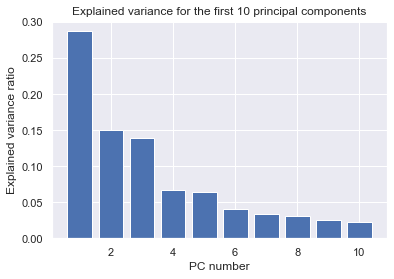

In [13]:
evecs, cod = pca_func(spell_new, 0, 10)

# Double check if this reports the ratio
plt.bar(1+np.arange(10), cod[np.arange(10)], align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('PC number')
plt.title('Explained variance for the first 10 principal components')
plt.show()

### 3.2 dimensionality reduction of the data

Project each of the gene expression vectors at 23 time points onto the top 2 principal components.

Two important steps: 

1) subtract off the mean of each variable before projecting them onto the PCs (use np.mean)

2) multiply the zero-mean data set by the two principal components

Plot the time trajectory in the plane of the two PCs, not as a scatterplot but as connected points.

Plot the projections of the two PCs as a function of time in a different plot, taking time from the first variable of `spellman` pandas object. Describe the collective dynamics of gene expression that are seen in the two principal components.

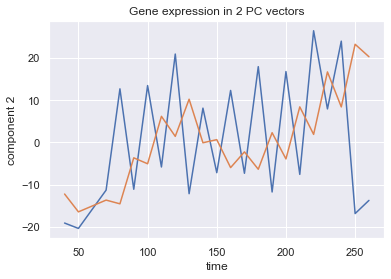

Text(0.5, 1.0, 'Gene expression in 2 PC vectors')

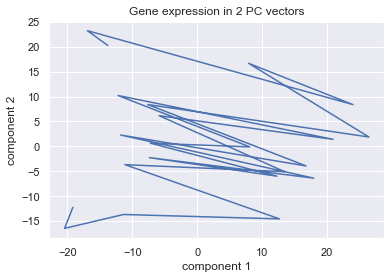

In [16]:
evecs, cod = pca_func(spell_new, 0, 2)

soa = np.subtract(spell_new, np.mean(spell_new))
cah = soa@evecs
plt.plot(spellman.time, cah)
plt.xlabel('time')
plt.ylabel('component 2')
plt.title('Gene expression in 2 PC vectors')

plt.show()

plt.plot(cah[0], cah[1])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Gene expression in 2 PC vectors')

plt.show()


# col = len(spell_new.columns)
# row = len(spell_new.index)

# for i in np.arange(0, col):
#     i_col = spell_new.iloc[:, i]
#     col_mean = np.mean(i_col)
#     for j in np.arange(0, row):
#         spell_new.iloc[j,i] = spell_new.iloc[j, i]-col_mean

# alpha = spell_new.to_numpy()
# beta = alpha@evecs

# sns.lineplot(beta[:, 0], beta[:, 1],
#             hue=spellman.time, palette="viridis")
# plt.xlabel('component 1')
# plt.ylabel('component 2')
# plt.show()

The collective dynamics of gene expression in both PC components have a positive relationship over time until when time = 250 when there is a sharp drop in the first PC line (blue) compared to PC 2 (orange).